https://www.kaggle.com/ezietsman/simple-python-lightgbm-example

In [2]:
import numpy as np
import pandas as pd
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [3]:
df = pd.read_csv("../Data/credit_fraud/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [14]:
columns = df.columns.tolist()
features = columns
features.remove('Class')
features.remove('Time')
X = df[features]
y = df['Class']

In [15]:
# Create training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
train_data = lightgbm.Dataset(X_train, label=y_train)
test_data = lightgbm.Dataset(X_test, label=y_test)

In [69]:
#
# Train the model
#

"""
    learning: keeping num_leaves small helped in obtaining both precision and recall values high 
"""

parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 11,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)

[1]	valid_0's auc: 0.945838
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.0829682
[3]	valid_0's auc: 0.902574
[4]	valid_0's auc: 0.911103
[5]	valid_0's auc: 0.911368
[6]	valid_0's auc: 0.912886
[7]	valid_0's auc: 0.91331
[8]	valid_0's auc: 0.923164
[9]	valid_0's auc: 0.925011
[10]	valid_0's auc: 0.925251
[11]	valid_0's auc: 0.927361
[12]	valid_0's auc: 0.927523
[13]	valid_0's auc: 0.924987
[14]	valid_0's auc: 0.915399
[15]	valid_0's auc: 0.916648
[16]	valid_0's auc: 0.915592
[17]	valid_0's auc: 0.914403
[18]	valid_0's auc: 0.904885
[19]	valid_0's auc: 0.905058
[20]	valid_0's auc: 0.90489
[21]	valid_0's auc: 0.904825
[22]	valid_0's auc: 0.912504
[23]	valid_0's auc: 0.914011
[24]	valid_0's auc: 0.914121
[25]	valid_0's auc: 0.916015
[26]	valid_0's auc: 0.916656
[27]	valid_0's auc: 0.916773
[28]	valid_0's auc: 0.917214
[29]	valid_0's auc: 0.917408
[30]	valid_0's auc: 0.91803
[31]	valid_0's auc: 0.918332
[32]	valid_0's auc: 0.918563
[33]	valid_0's auc: 

In [70]:
y_test_pred = model.predict(X_test)

In [71]:
import numpy as np
from sklearn.metrics import precision_recall_curve

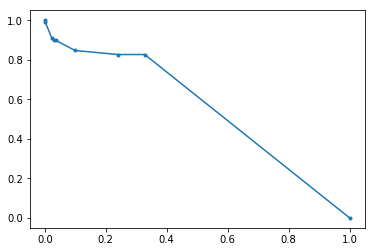

In [72]:
from matplotlib import pyplot
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)

pyplot.plot(precision, recall, marker='.')
# show the plot
pyplot.show()

In [73]:
pr = pd.DataFrame({'p': precision, 'r': recall})

In [74]:
pr[(pr.r > 0.5)]

,p,r
0,0.001720,1.000000
1,0.001816,0.989796
2,0.023570,0.908163
3,0.029091,0.897959
4,0.036274,0.897959
5,0.099282,0.846939
6,0.240356,0.826531
7,0.327935,0.826531
